In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('vgsalesGlobale.csv')

In [3]:
df.shape

(16598, 11)

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
df.fillna(df.mean(),inplace=True)

C:\Users\adhav\AppData\Local\Temp/ipykernel_11808/2085774198.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [9]:
df['Publisher'].fillna(df.Publisher.mode()[0], inplace=True)

In [10]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 1- Which company is the most common video game publisher?

In [12]:
df['Publisher'].value_counts()

Electronic Arts                 1409
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [13]:
d40=df.groupby(["Publisher"],as_index=False).agg(Count=("Publisher","count"))
d41=d40.loc[d40["Publisher"] == 'Electronic Arts']
d41

,Publisher,Count
138,Electronic Arts,1409


Electronic Arts is the most comman video game publisher.

## 2- What’s the most common platform?

In [14]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [15]:
pf=df.groupby(["Platform"],as_index=False).agg(Count=("Platform","count"))
pf1=pf.loc[pf["Platform"] == 'DS']
pf1

,Platform,Count
4,DS,2163


DS is the most comman platform.

## Games per year

In [16]:
gh=df.groupby(['Year'],as_index=False)['Name'].count()
gh

,Year,Name
0,1980.000000,9
1,1981.000000,46
2,1982.000000,36
3,1983.000000,17
4,1984.000000,14
5,1985.000000,14
6,1986.000000,21
7,1987.000000,16
8,1988.000000,15
9,1989.000000,17


In [17]:
gh=df.groupby(['Year'],as_index=False).agg(count=('Name','count'))
gh

,Year,count
0,1980.000000,9
1,1981.000000,46
2,1982.000000,36
3,1983.000000,17
4,1984.000000,14
5,1985.000000,14
6,1986.000000,21
7,1987.000000,16
8,1988.000000,15
9,1989.000000,17


C:\Users\adhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


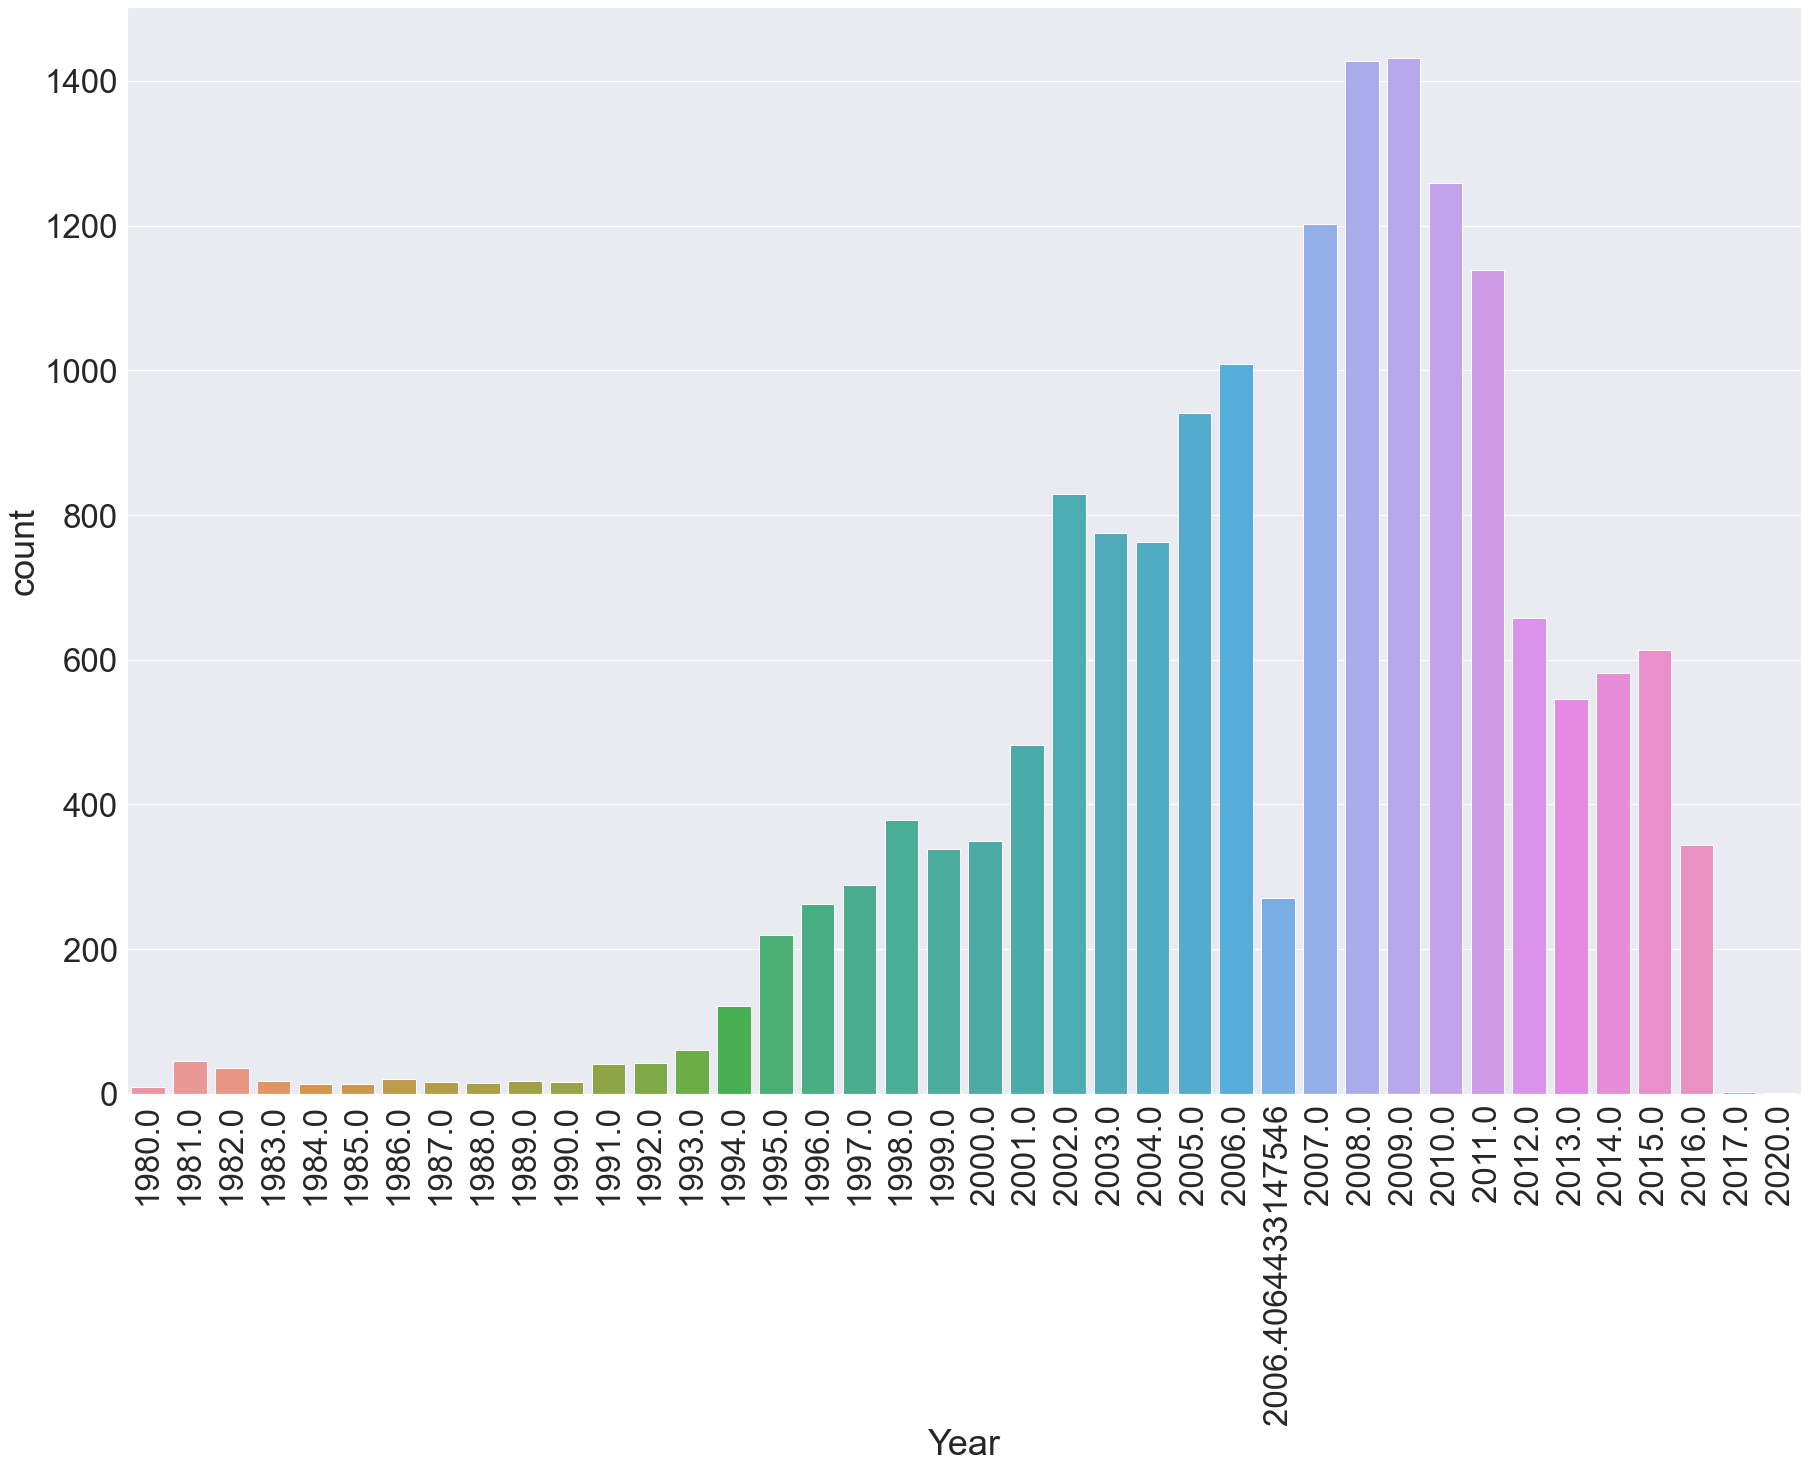

In [24]:
df54 = sns.barplot(gh["Year"],gh["count"], data=gh)
sns.set(rc = {'figure.figsize':(50,20)})
df54.set_xticklabels(df54.get_xticklabels(),rotation = 90)
sns.set(font_scale=2)

In the year 2009 and 2008 most games are sold respectively

In the year 2017,2020 the sale has suddenly down

## Games per genre per year

In [19]:
hg=df.groupby(['Genre','Year'],as_index=False).agg(count=('Name','count'))
hg

,Genre,Year,count
0,Action,1980.0,1
1,Action,1981.0,25
2,Action,1982.0,18
3,Action,1983.0,7
4,Action,1984.0,1
...,...,...,...
396,Strategy,2012.0,15
397,Strategy,2013.0,19
398,Strategy,2014.0,8
399,Strategy,2015.0,17


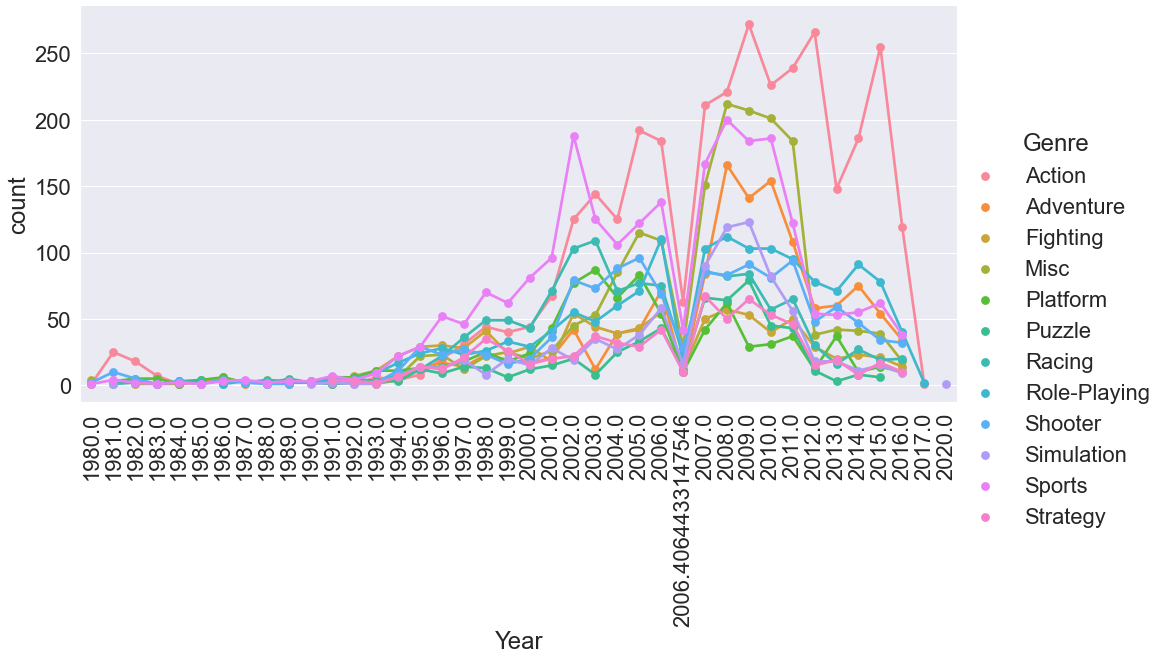

In [20]:
g = sns.catplot(x="Year", y="count", hue='Genre', data=hg, kind='point',height=7, aspect=2)
#g.set_xticklabels(g.get_xticklabels(),rotation = 90)
g.set_xticklabels(rotation=90)

In the year 2006 to 2016 Action genre game sales is high and is suddnely collapse in the year 2017

## Top 5 Genres

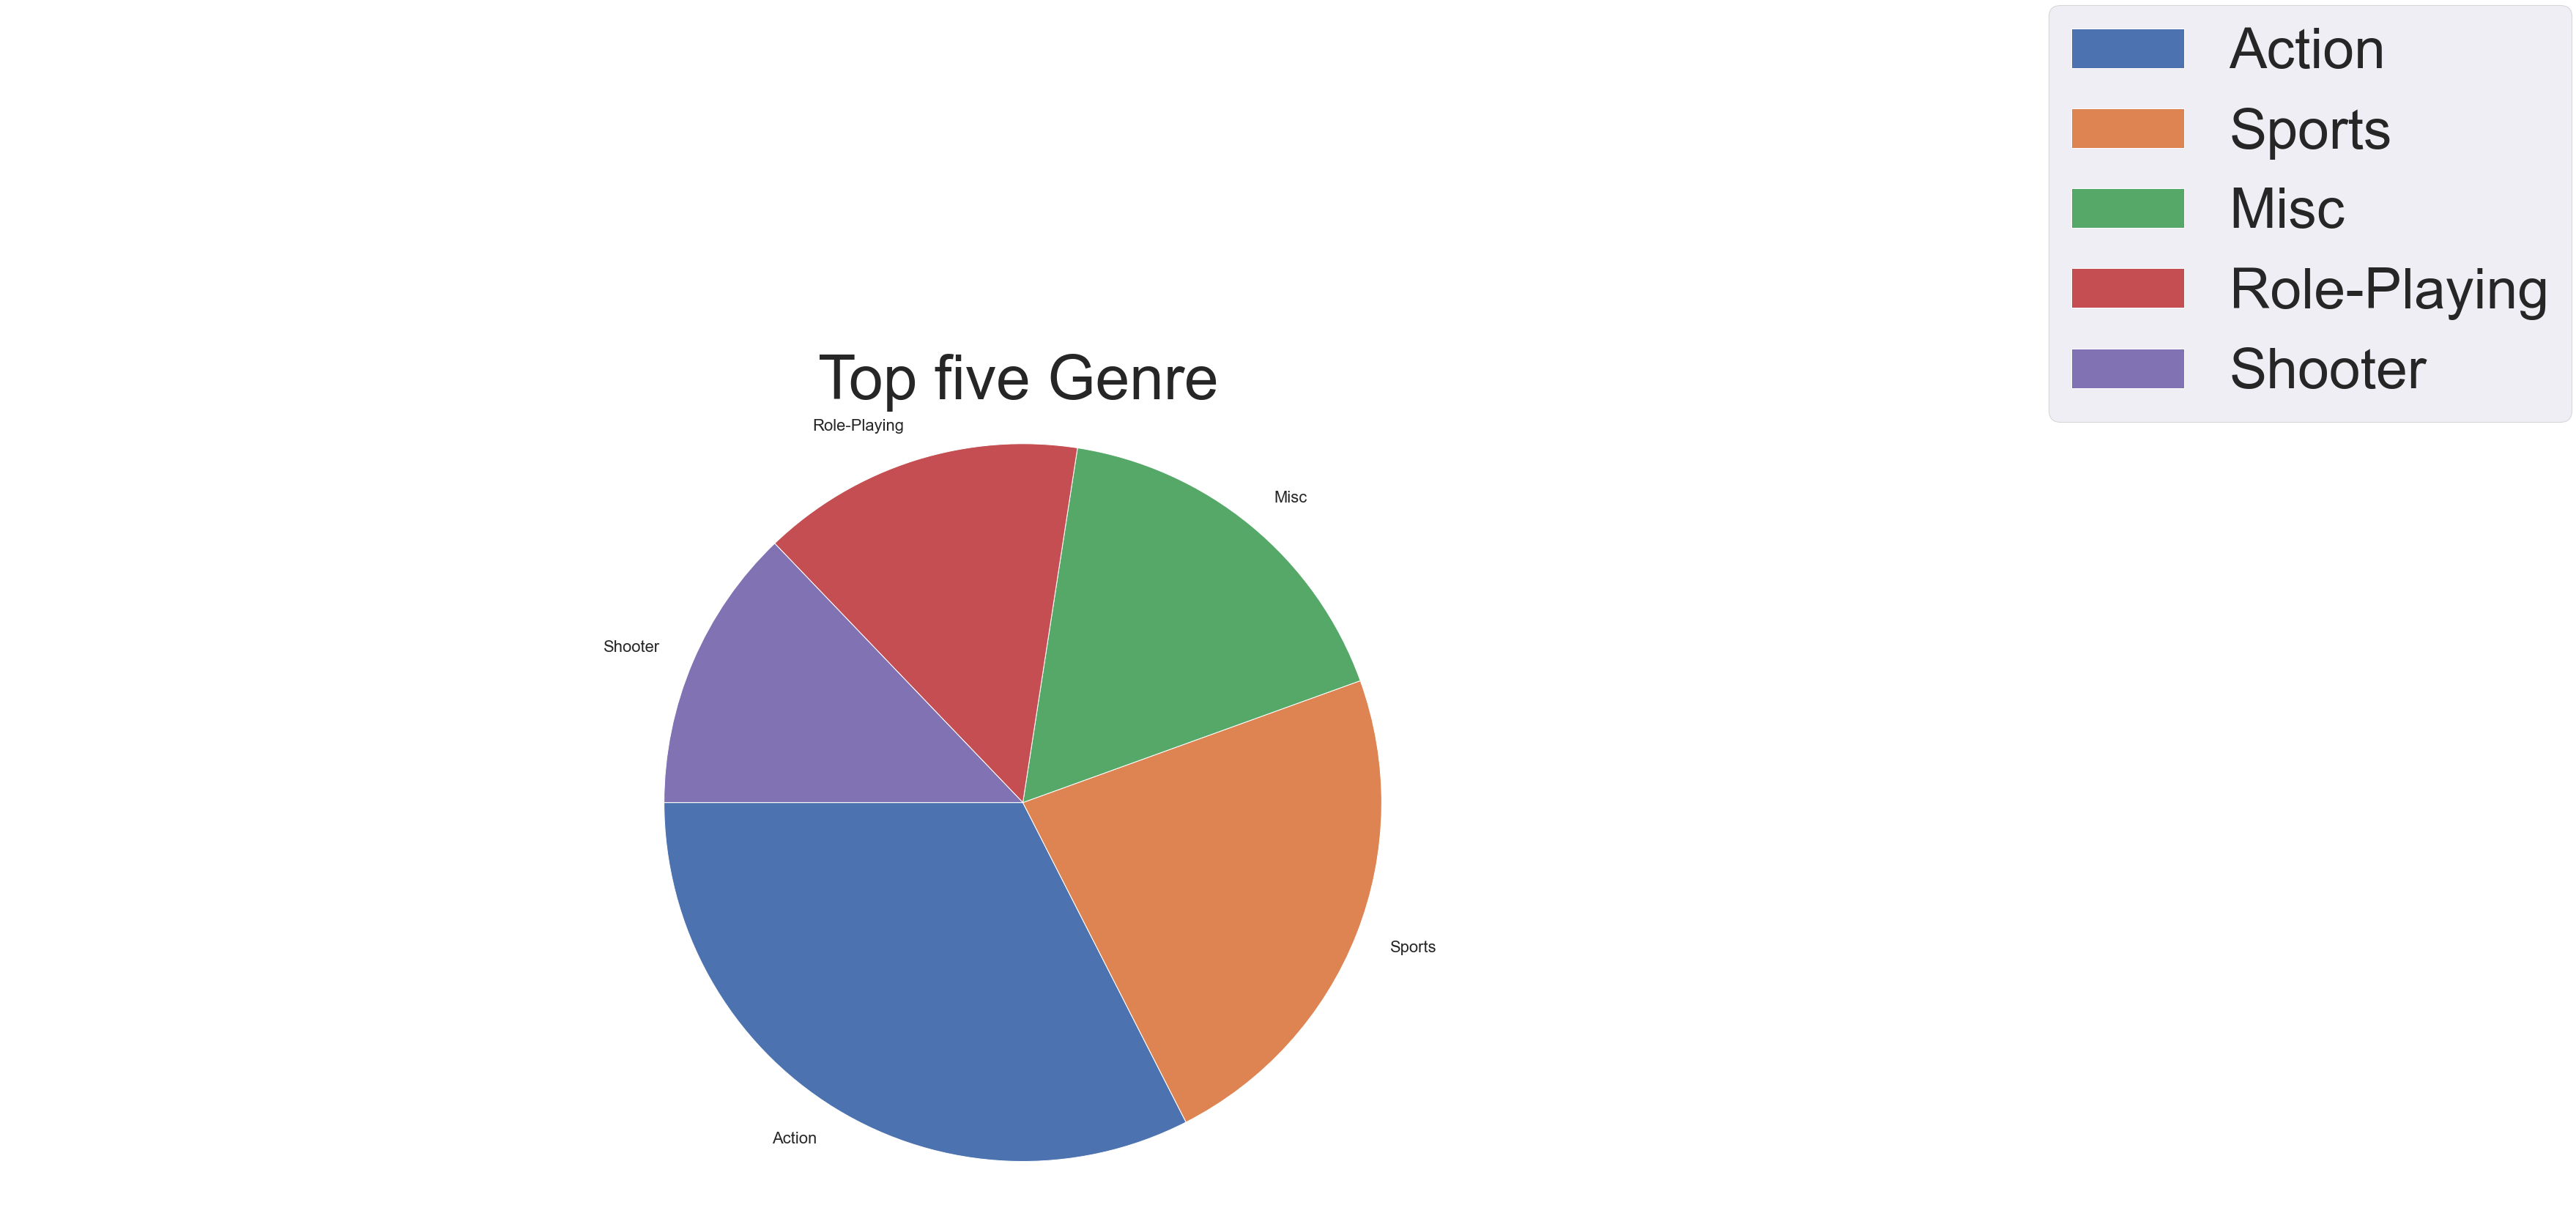

In [21]:
top=df['Genre'].value_counts().head(5)
mylables4=['Action','Sports','Misc','Role-Playing','Shooter']
plt.pie(top, labels=mylables4,explode=None,startangle=180)
sns.set(font_scale=7)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1,1.5), loc='upper left', borderaxespad=0)
plt.title('Top five Genre ')
plt.show()


Top five Genre are:
    
    Action          3316
    Sports          2346
    Misc            1739
    Role-Playing    1488
    Shooter         1310 

## Most Active Publisher (by number of Games)

In [22]:
active=df.groupby(["Publisher"],as_index=False).agg(count=('Name','count')).sort_values('count',ascending=False).head(10)

C:\Users\adhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adhav\AppData\Local\Temp/ipykernel_11808/1109648625.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  uu.set_xticklabels(uu.get_xticklabels(),rotation = 90)


[Text(0.0, 0, ''),
 Text(200.0, 0, ''),
 Text(400.0, 0, ''),
 Text(600.0, 0, ''),
 Text(800.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(1200.0, 0, ''),
 Text(1400.0, 0, ''),
 Text(1600.0, 0, '')]

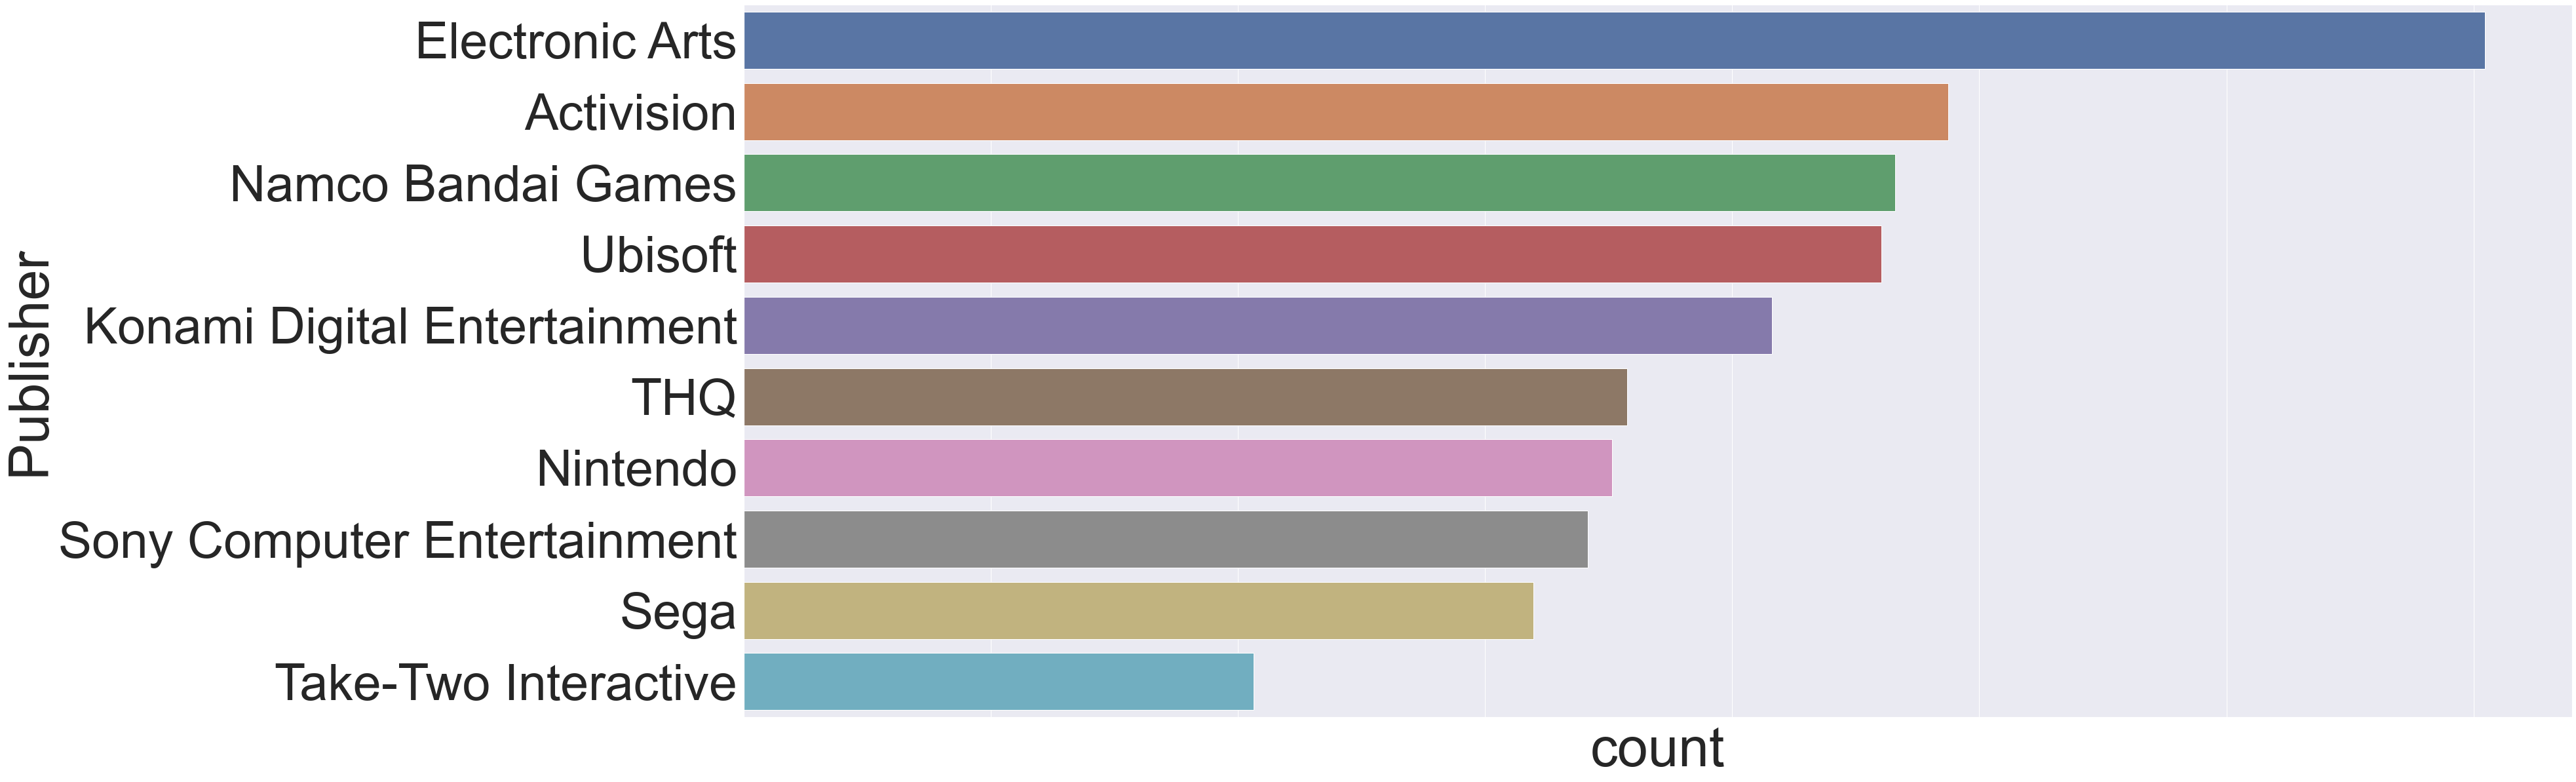

In [23]:
uu = sns.barplot(active["count"],active["Publisher"], data=active,orient='h')
sns.set(rc = {'figure.figsize':(30,20)})
sns.set(font_scale=3)
uu.set_xticklabels(uu.get_xticklabels(),rotation = 90)